# Pruebas del Particle Swarm Optimization
## David Omar Paredes Paredes y Abraham Maximiliano Ávalos Corrales

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import PSO               as ps

from BetaShF import ShF
from BetaShM import ShM

In [2]:
def single_objective_func(x, alpha:float=0.5):
	return alpha*ShF(x) + (1-alpha)*ShM(x)

bounds = np.array(
	[
		[-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04],
		[-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04],
		[-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04],
		[-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04],
		[-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04]
	]
)

In [3]:
N_TESTS = 5

best = np.zeros((N_TESTS, 15))

for i, alpha in enumerate(np.arange(0.0, 1.0, 1.0/N_TESTS)):
	pso = ps.ParticleSwarmOptimization(
		single_objective_func,
		bounds,
		function_args=(alpha,),
		pop_size=45, max_it=80,
		min_vel=0.001, max_vel=0.02
	)
	print(f'Test {i+1}', end=' ')
	best[i] = pso.optimize()
	print('finished!')
print(best[:5])

Test 1 finished!
Test 2 finished!
Test 3 finished!
Test 4 finished!
Test 5 finished!
[[-1.70179056e-02 -1.67885844e-03  2.90428064e-02 -4.87694132e-03
   6.03960418e-03  1.81379011e-02 -5.99139602e-02  1.37088714e-02
   4.00000000e-02 -1.33042384e-04 -2.65599629e-04  4.00000000e-02
   1.35322026e-03  1.37124602e-03  1.67388683e-02]
 [-4.62944442e-03  2.99120116e-04  4.00000000e-02  3.16801421e-03
   2.72327584e-03  4.00000000e-02 -5.88641484e-02  1.18727142e-02
   4.00000000e-02 -3.77072722e-05  1.96775797e-04  4.00000000e-02
  -9.70171668e-05  1.01113910e-03  4.00000000e-02]
 [ 1.40637392e-04  8.77486413e-04  4.00000000e-02  8.80237155e-04
   4.66626230e-04  4.00000000e-02 -5.75487682e-02  6.22567769e-03
   4.00000000e-02 -3.58322226e-05  4.27981387e-05  4.00000000e-02
  -3.97007830e-04  9.71715363e-05  4.00000000e-02]
 [ 3.93488680e-03  1.27915761e-03  4.00000000e-02 -4.49291240e-02
   7.98532835e-03  4.00000000e-02 -4.91962059e-02 -2.05189940e-02
   4.00000000e-02  6.93186258e-04  7

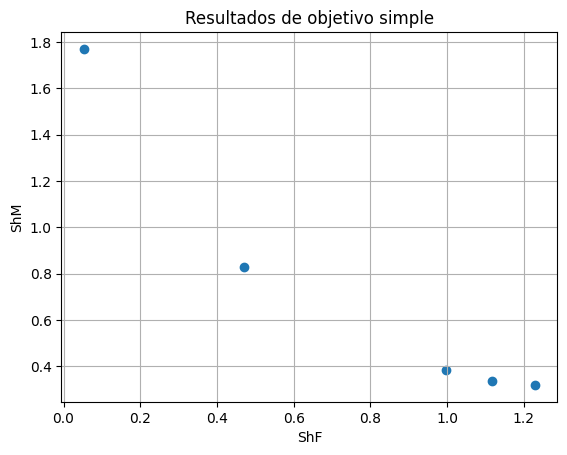

In [4]:
X = np.zeros((N_TESTS))
Y = np.zeros((N_TESTS))

for i in range(N_TESTS):
	X[i] = ShF(best[i])
	Y[i] = ShM(best[i])

fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)

plt.title('Resultados de objetivo simple')
# plt.axis('equal')
plt.xlabel('ShF')
plt.ylabel('ShM')

plt.scatter(X, Y)

plt.grid(True)
plt.show()

In [5]:
pso_ntar = ps.MultiObjectiveParticleSwarmOptimization(
	[ShF, ShM], bounds, [(), ()],
	pop_size=80, max_it=100,
	min_vel=0.001, max_vel=0.02
)

best_ntar = np.array(pso_ntar.optimize())
print(best_ntar[:5])

[[ 0.01030286  0.00513127  0.03997667 -0.05206962 -0.00152414  0.03986744
  -0.06261737  0.00866448  0.02425505  0.00167704  0.00072572  0.03999575
  -0.0023177   0.00209824  0.03144725]
 [ 0.00837856  0.00488724  0.03997697 -0.05122327 -0.00240159  0.03981153
  -0.0614459   0.00427908  0.02395724  0.00104407 -0.0002927   0.03998487
  -0.00160997  0.00288321  0.03152814]
 [ 0.00887564  0.00446906  0.0399865  -0.05133442 -0.00333037  0.03978745
  -0.06168585  0.00554997  0.0240049   0.00050436  0.00091741  0.03997688
  -0.00233027  0.00224354  0.03154908]
 [ 0.00712778  0.005221    0.03997813 -0.05116093 -0.00473104  0.03984095
  -0.06158125  0.00338923  0.02383491  0.00112243  0.00032443  0.0399885
  -0.00174816  0.00329839  0.03144477]
 [ 0.01125772  0.00524721  0.03997967 -0.05084539 -0.00245003  0.03984013
  -0.06317568  0.00954877  0.02447069  0.00209481  0.00149514  0.03999068
  -0.0032683   0.00210611  0.03168151]]


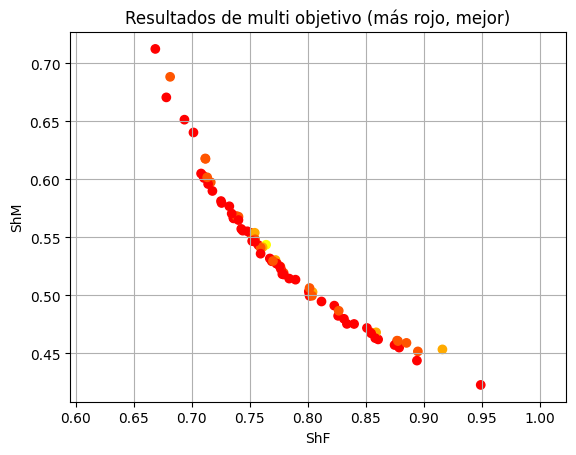

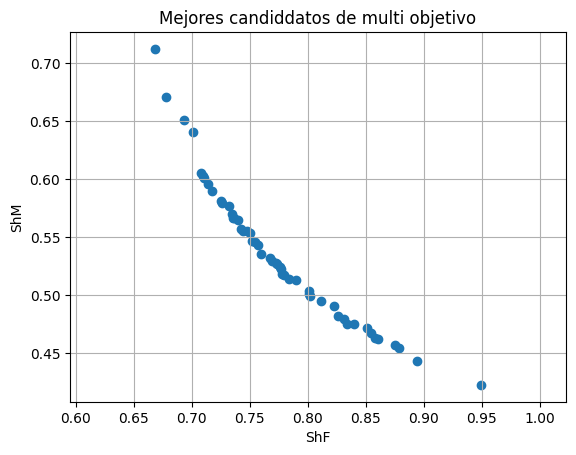

In [10]:
N_BEST = len(best_ntar)
X = np.zeros((N_BEST))
Y = np.zeros((N_BEST))

for i in range(N_BEST):
	X[i] = ShF(best_ntar[i])
	Y[i] = ShM(best_ntar[i])

plt.title('Resultados de multi objetivo (más rojo, mejor)')
plt.axis('equal')
plt.xlabel('ShF')
plt.ylabel('ShM')

plt.scatter(pso_ntar.Fit[:,0], pso_ntar.Fit[:,1], c=pso_ntar.Lev, cmap='autumn')

plt.grid(True)
plt.show()

plt.title('Mejores candiddatos de multi objetivo')
plt.axis('equal')
plt.xlabel('ShF')
plt.ylabel('ShM')

plt.scatter(X, Y)

plt.grid(True)
plt.show()